In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
import pandas as pd

In [2]:
data = np.loadtxt('data/click.csv', delimiter=',', skiprows=1, dtype=np.int16)

In [3]:
train_x = data[:,0]  
train_y = data[:,1]  

In [4]:
# 표준화
mu = train_x.mean()
sigma = train_x.std()
def standardize(x):
    return (x - mu) / sigma

In [5]:
train_z = standardize(train_x)


In [6]:
# 매개변수를 초기화한다
theta0 = np.random.rand()
theta1 = np.random.rand()

In [7]:
#hypothesis function
def h(x):
    return theta1 * x + theta0

In [8]:
# 목적함수
def E(x, y):
    return 0.5 * np.sum((y - h(x)) ** 2)


In [9]:
# 학습률
ETA = 1e-3

In [10]:
error = E(train_z, train_y)
error

1936456.3424418292

In [11]:
diff = 1
count = 0 # 매개변수 갱신횟수
while diff > 0.01 :
    # 갱신 결과를 임시변수에 저장한다
    tmp_theta0 = theta0 - ETA * np.sum((h(train_z) - train_y))
    tmp_theta1 = theta1 - ETA * np.sum((h(train_z) - train_y) * train_z)

    # 매개변수를 갱신한다
    theta0 = tmp_theta0
    theta1 = tmp_theta1

    # 이전 회의 오차와의 차분을 계산한다
    current_error = E(train_z, train_y)
    diff = error - current_error
    error = current_error

    # 로그를 출력한다
    count += 1
    log = '{}회째: theta0 = {:.3f}, theta1 = {:.3f}, 차분 = {:.4f}'
    print(log.format(count, theta0, theta1, diff))

1회째: theta0 = 8.747, theta1 = 2.256, 차분 = 76305.7496
2회째: theta0 = 17.155, theta1 = 4.080, 차분 = 73284.0419
3회째: theta0 = 25.395, theta1 = 5.868, 차분 = 70381.9938
4회째: theta0 = 33.470, theta1 = 7.620, 차분 = 67594.8669
5회째: theta0 = 41.383, theta1 = 9.338, 차분 = 64918.1101
6회째: theta0 = 49.139, theta1 = 11.020, 차분 = 62347.3530
7회째: theta0 = 56.739, theta1 = 12.670, 차분 = 59878.3978
8회째: theta0 = 64.187, theta1 = 14.286, 차분 = 57507.2133
9회째: theta0 = 71.486, theta1 = 15.870, 차분 = 55229.9276
10회째: theta0 = 78.640, theta1 = 17.422, 차분 = 53042.8225
11회째: theta0 = 85.650, theta1 = 18.943, 차분 = 50942.3267
12회째: theta0 = 92.520, theta1 = 20.434, 차분 = 48925.0106
13회째: theta0 = 99.252, theta1 = 21.895, 차분 = 46987.5801
14회째: theta0 = 105.850, theta1 = 23.326, 차분 = 45126.8720
15회째: theta0 = 112.316, theta1 = 24.729, 차분 = 43339.8478
16회째: theta0 = 118.653, theta1 = 26.104, 차분 = 41623.5899
17회째: theta0 = 124.863, theta1 = 27.452, 차분 = 39975.2957
18회째: theta0 = 130.949, theta1 = 28.772, 차분 = 38392.2740
19

In [12]:
tmp_theta0, tmp_theta1

(429.0001992303629, 93.44626278769294)

In [13]:
x = np.linspace(-3, 3, 100)  #-3에서 3까지 100개의 구간으로 나눔

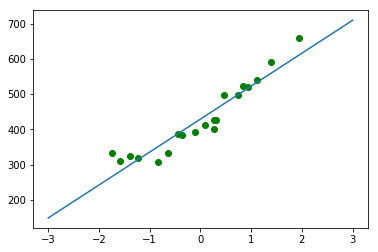

In [14]:

plt.scatter(train_z, train_y, color='green', marker='o')
plt.plot(x, h(x))
plt.show()
